### Importing Basic Libraries:

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('Uncleaned_employees_final_dataset.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


### Data Understanding:

In [3]:
df.shape

(17417, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,17417.0,39083.491129,22707.024087,3.0,19281.0,39122.0,58838.0,78295.0
no_of_trainings,17417.0,1.250732,0.595692,1.0,1.0,1.0,1.0,9.0
age,17417.0,34.807774,7.694046,20.0,29.0,33.0,39.0,60.0
previous_year_rating,16054.0,3.345459,1.265386,1.0,3.0,3.0,4.0,5.0
length_of_service,17417.0,5.801860,4.175533,1.0,3.0,5.0,7.0,34.0
KPIs_met_more_than_80,17417.0,0.358845,0.479675,0.0,0.0,0.0,1.0,1.0
awards_won,17417.0,0.023368,0.151074,0.0,0.0,0.0,0.0,1.0
avg_training_score,17417.0,63.176322,13.418179,39.0,51.0,60.0,75.0,99.0


In [6]:
df.isnull().sum()

employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

### Step#1: Removing duplicate rows

In [7]:
df.duplicated().sum()

2

In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(17415, 13)

### Step#2 Removing rows for which numeric columns are having irrelevant data type values

In [10]:
numeric = df.select_dtypes(include='number').columns
numeric

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score'],
      dtype='object')

In [11]:
for col in numeric:
    print('----'*20)
    print(col)
    print(df[col].unique().tolist())
    

--------------------------------------------------------------------------------
employee_id
[8724, 74430, 72255, 38562, 64486, 46232, 54542, 67269, 66174, 76303, 60245, 42639, 30963, 54055, 42996, 12737, 27561, 26622, 31582, 29793, 72735, 5677, 60889, 51498, 8566, 53151, 16203, 61083, 74849, 13259, 72407, 65237, 67672, 77460, 67317, 68788, 36834, 64281, 1822, 55325, 41432, 52061, 39973, 42524, 7935, 49940, 10059, 44159, 76691, 3720, 5621, 24147, 33997, 64076, 21379, 23714, 19866, 4529, 64703, 19649, 6596, 7999, 4762, 5387, 24620, 57989, 75619, 26977, 65975, 51302, 63714, 70556, 70117, 51972, 60572, 9548, 64, 35510, 10732, 9214, 10761, 32110, 50038, 1555, 21200, 50380, 45009, 65450, 77333, 2347, 8443, 39490, 69077, 64652, 5254, 71131, 19620, 41266, 11001, 28530, 72481, 67417, 51840, 43223, 40287, 29367, 36352, 29681, 30233, 66601, 40276, 1522, 17936, 26270, 6837, 49665, 1908, 6474, 27495, 24324, 14299, 56246, 3901, 41566, 55735, 53627, 62683, 42719, 44948, 26037, 30607, 46103, 6452, 47

In [12]:
df['previous_year_rating']

0        NaN
1        3.0
2        1.0
3        2.0
4        4.0
        ... 
17410    3.0
17411    2.0
17412    5.0
17413    1.0
17416    5.0
Name: previous_year_rating, Length: 17415, dtype: float64

In [13]:
df['previous_year_rating'] = df['previous_year_rating'].fillna(0)

In [14]:
df['previous_year_rating']

0        0.0
1        3.0
2        1.0
3        2.0
4        4.0
        ... 
17410    3.0
17411    2.0
17412    5.0
17413    1.0
17416    5.0
Name: previous_year_rating, Length: 17415, dtype: float64

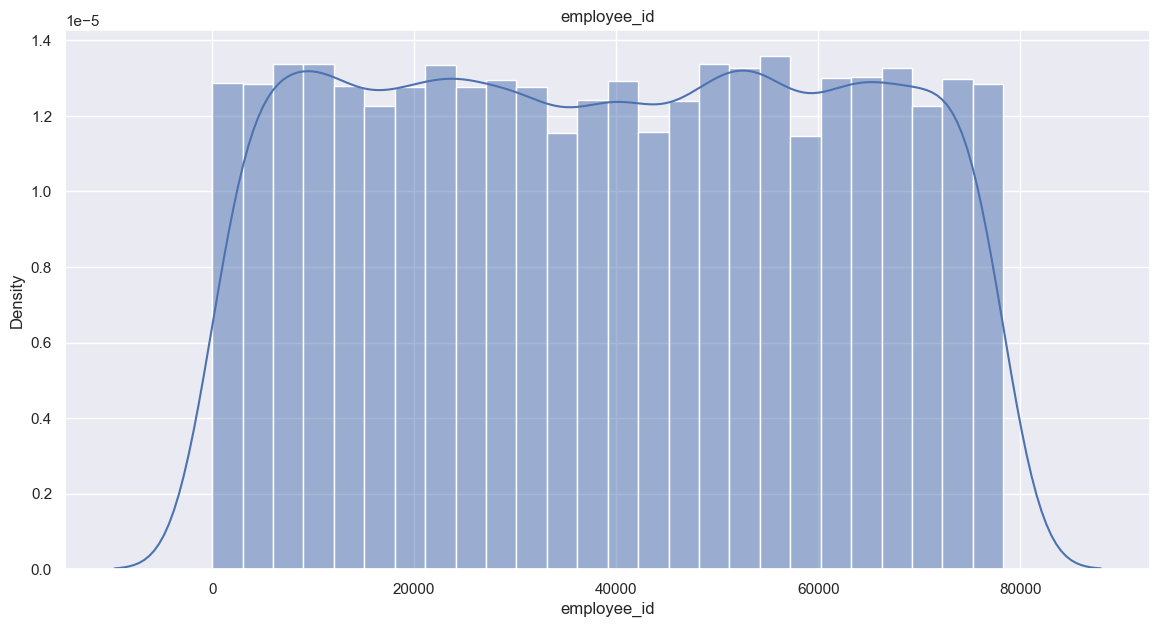

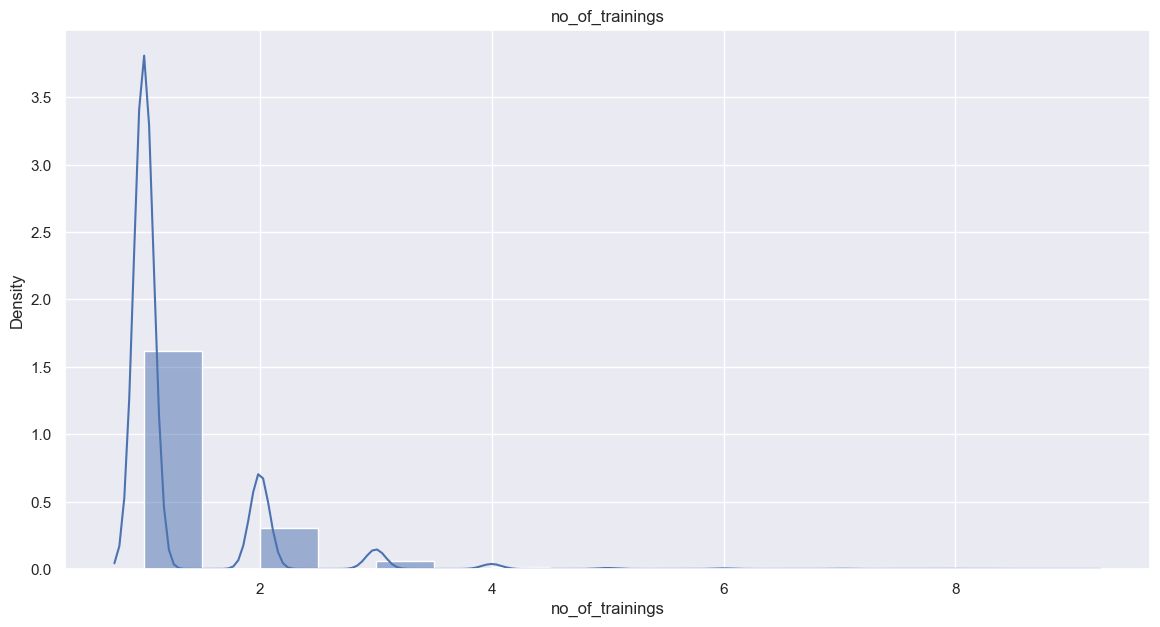

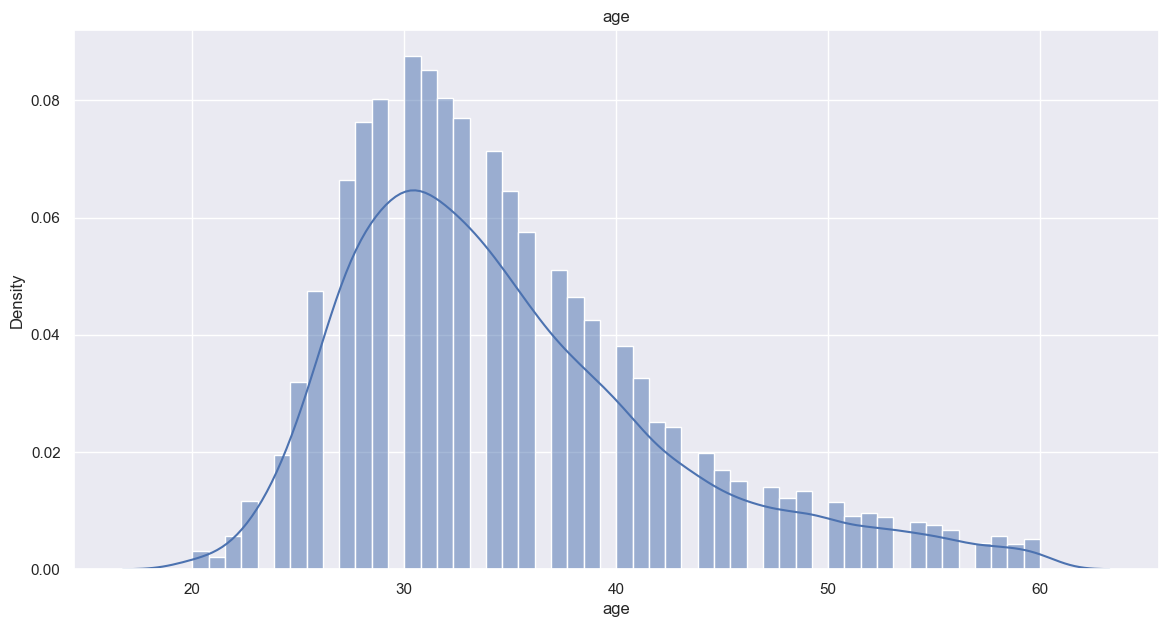

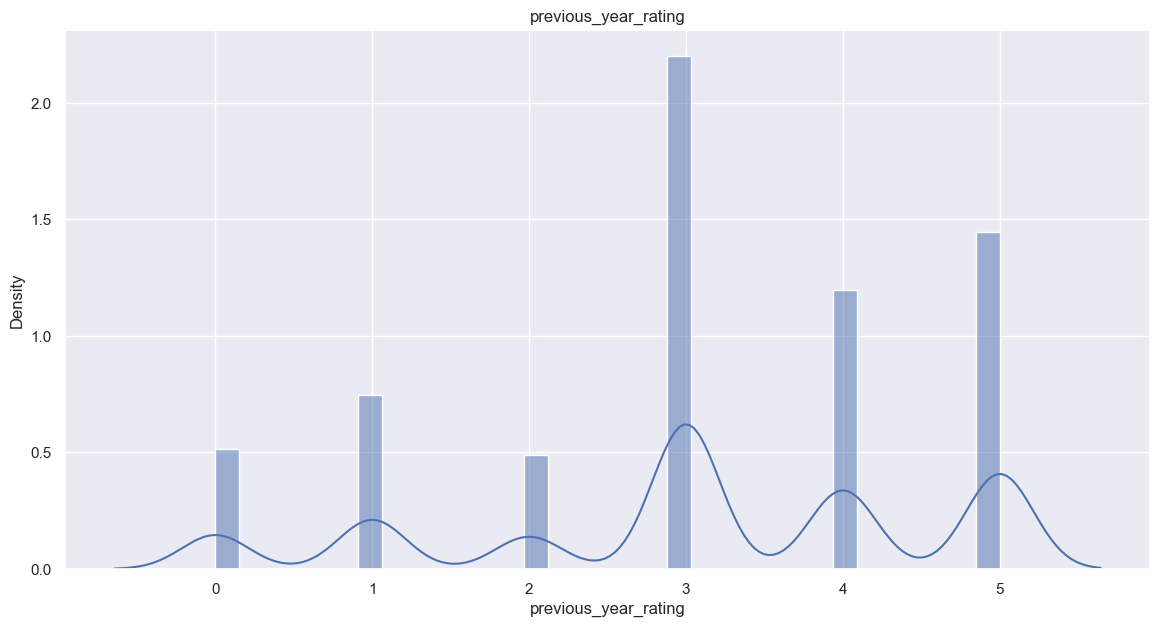

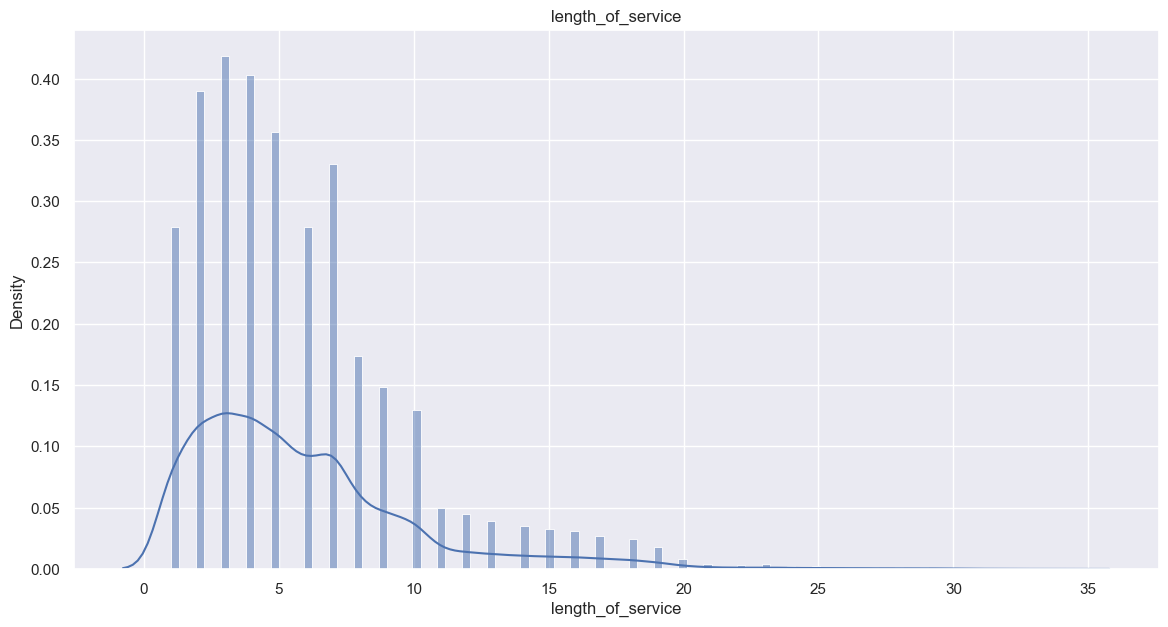

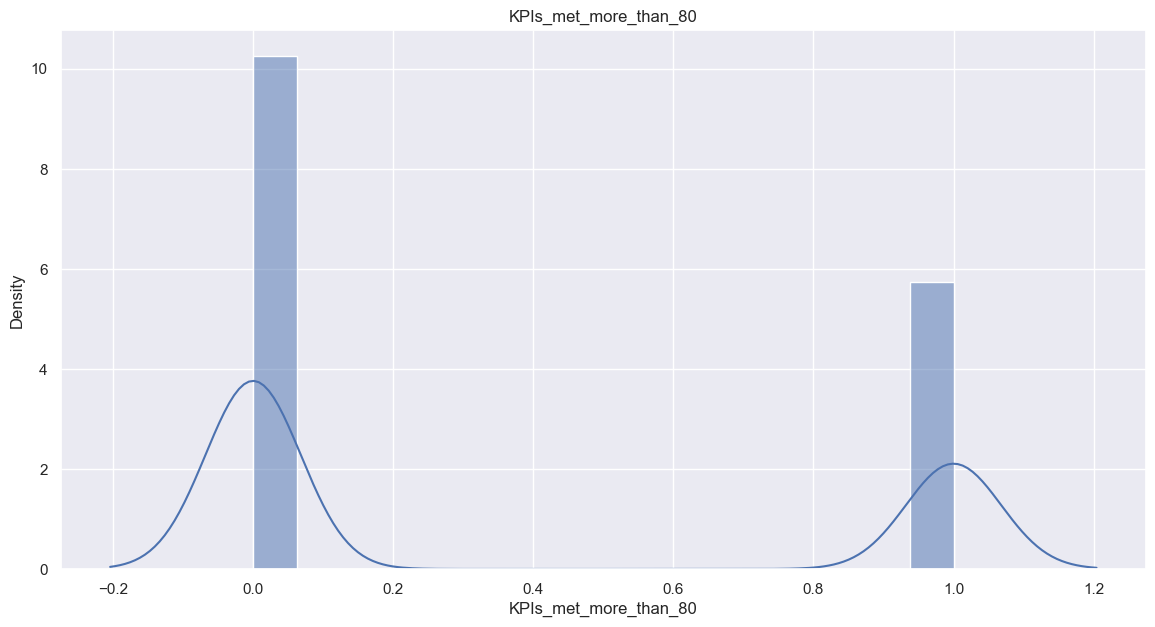

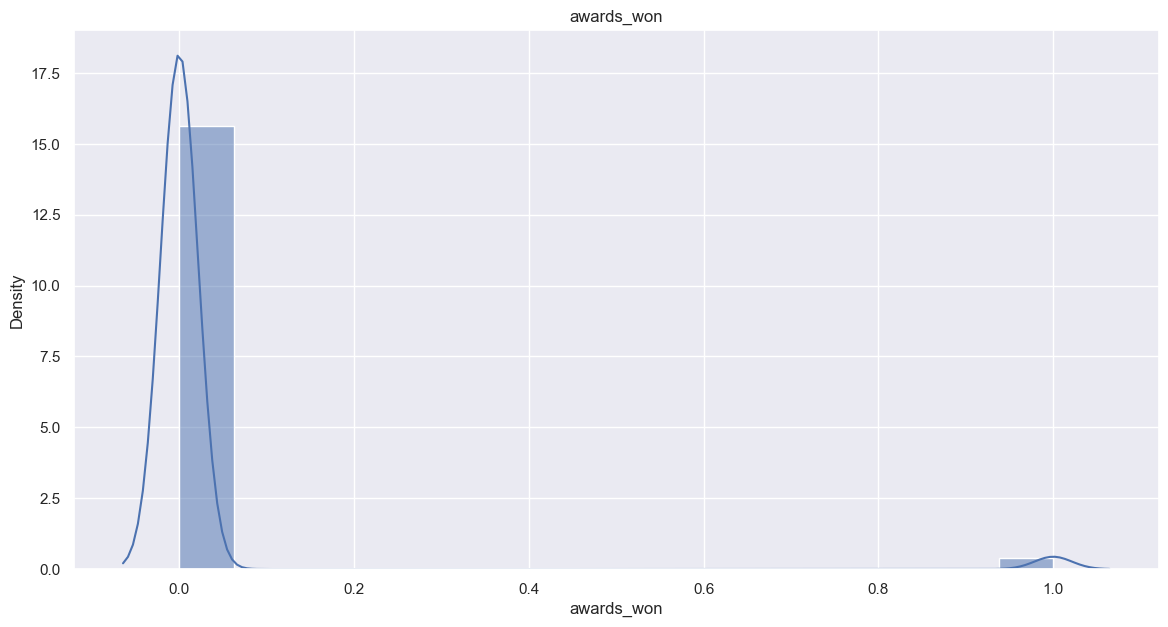

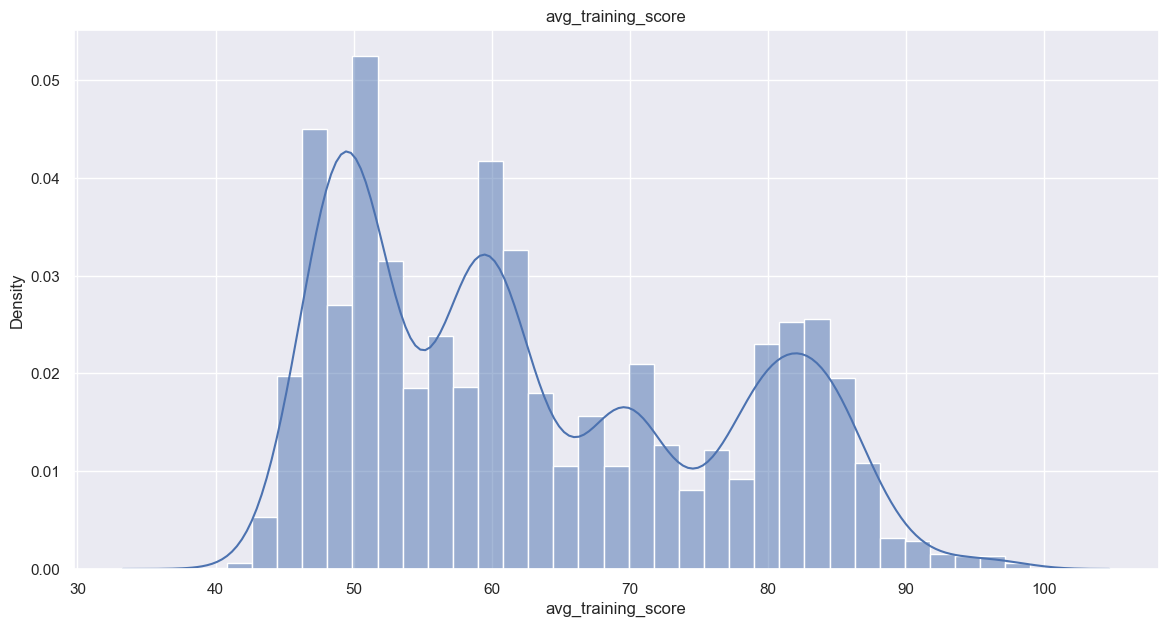

In [45]:
for col in numeric:
    plt.figure(figsize=(14,7))
    plt.title(col)
    sns.histplot(df[col], kde=True,stat='density', kde_kws=dict(cut=3))
    plt.show()

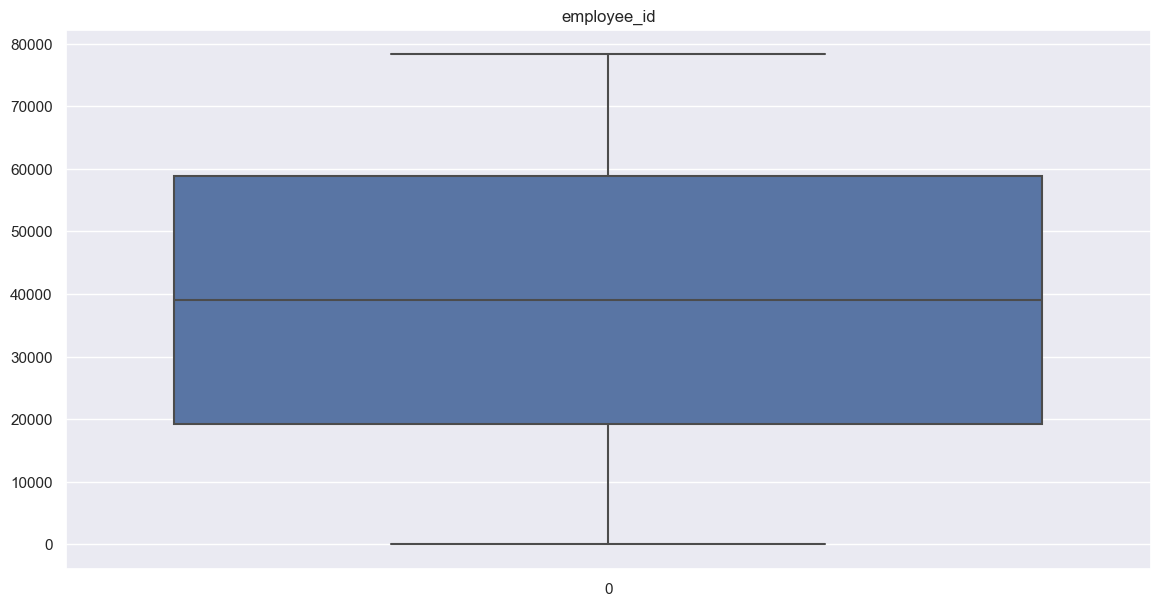

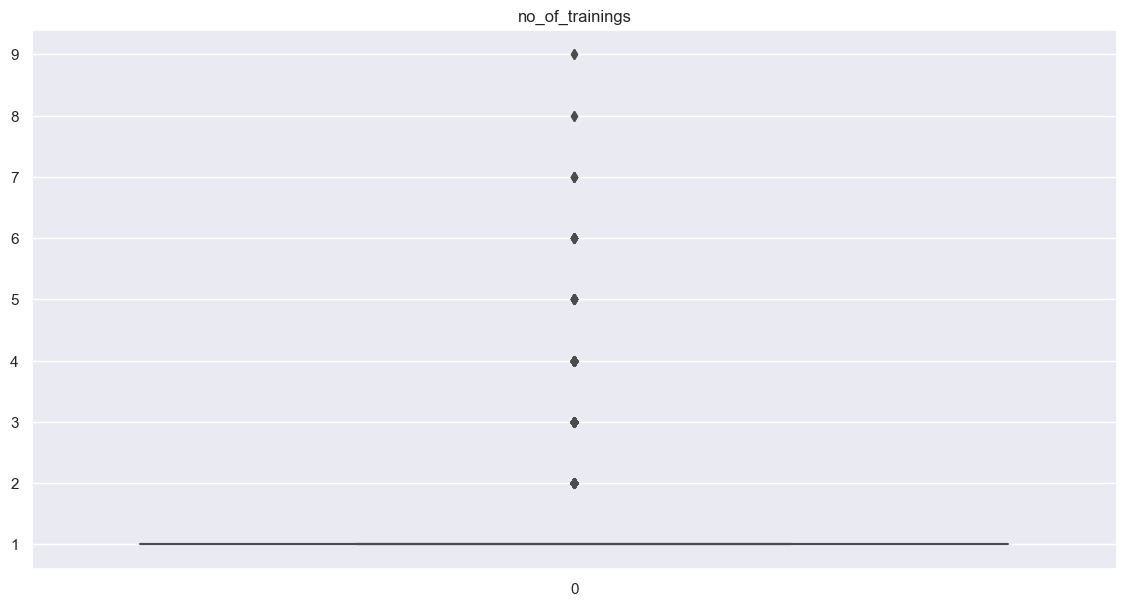

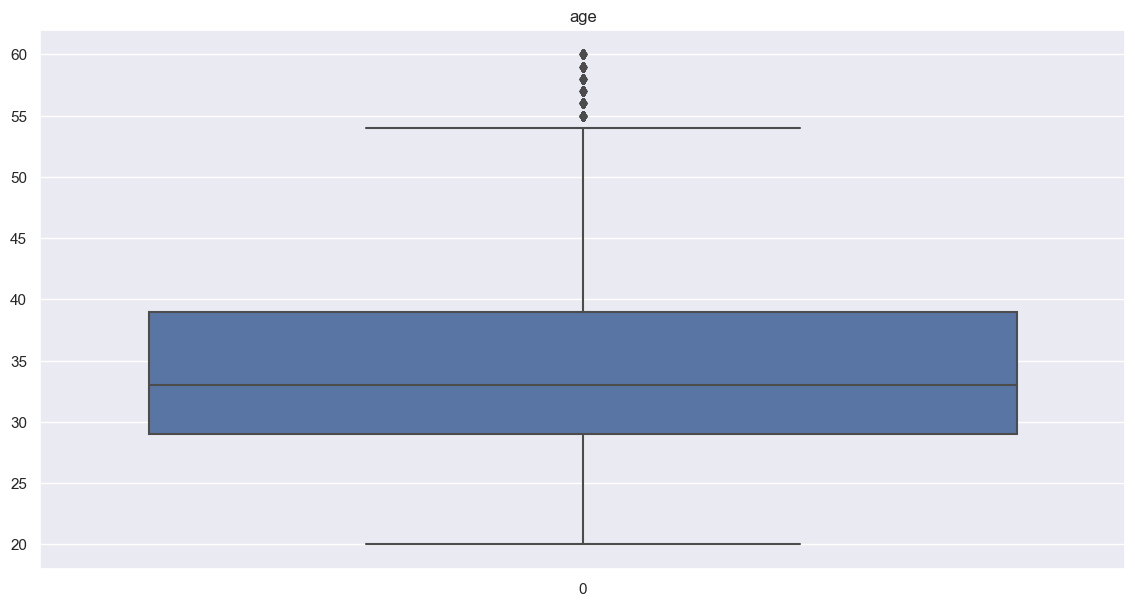

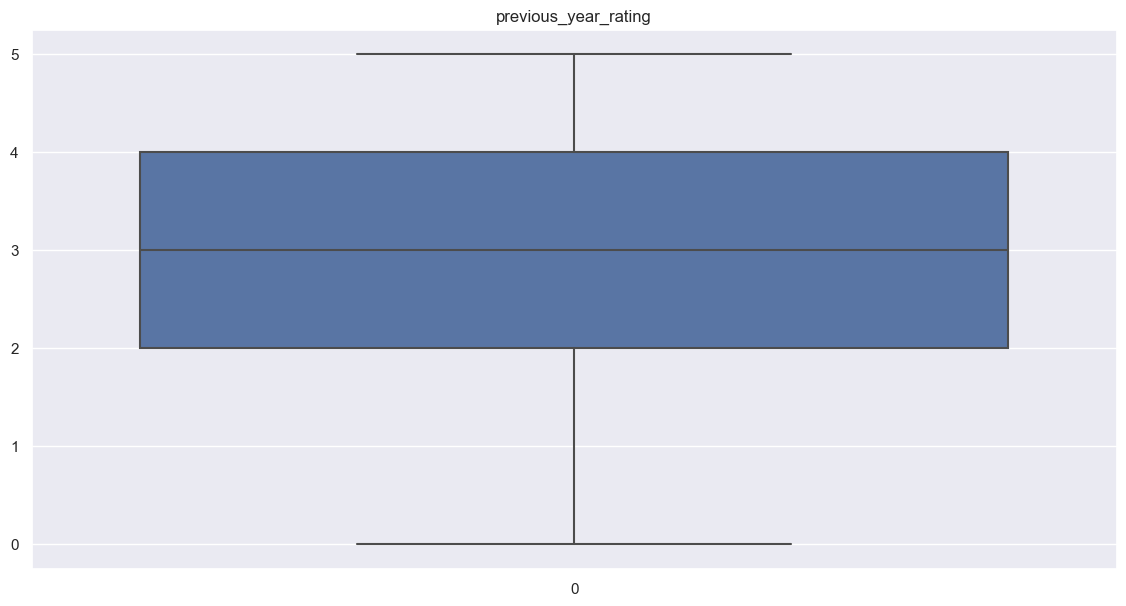

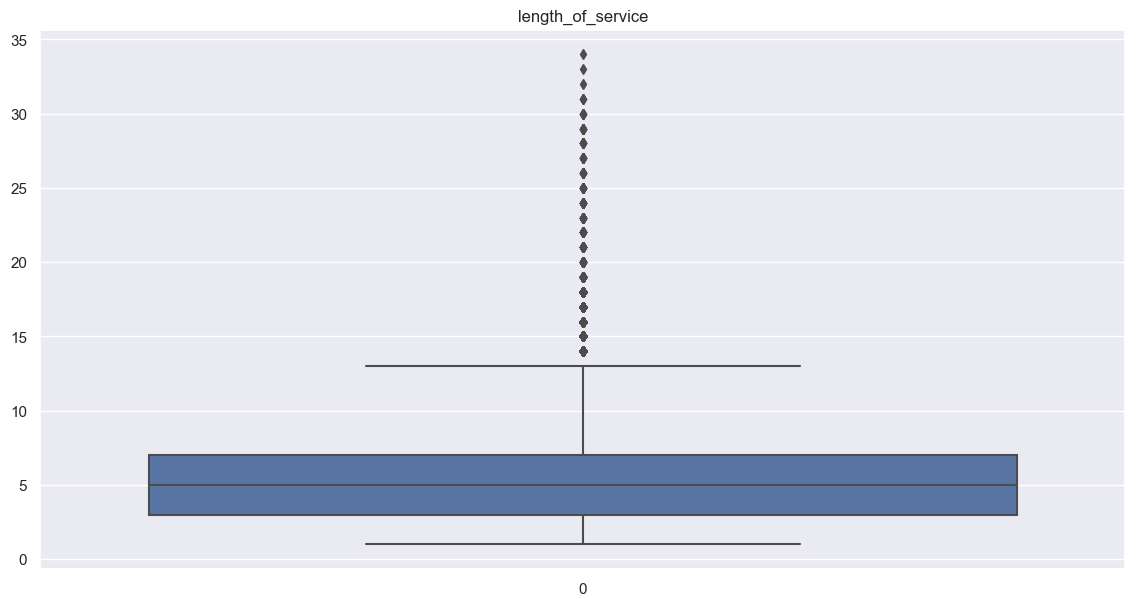

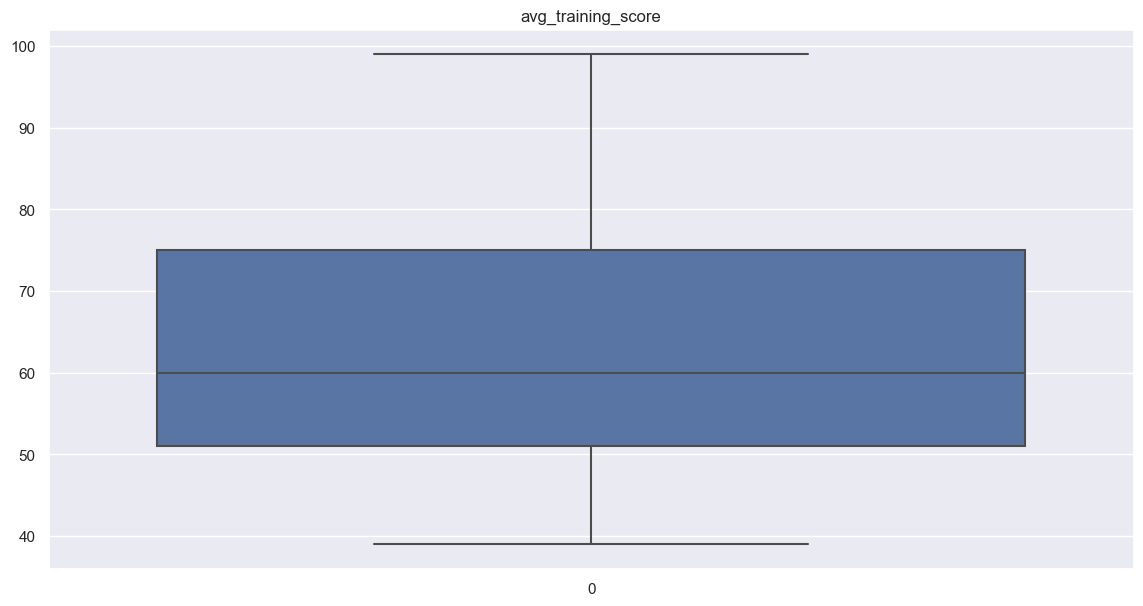

In [46]:
c = ['KPIs_met_more_than_80','awards_won']
for col in numeric:
    if col not in c:
        plt.figure(figsize=(14,7))
        plt.title(col)
        sns.boxplot(df[col])
        plt.show()

In [44]:
df['KPIs_met_more_than_80'].value_counts()

0    11165
1     6250
Name: KPIs_met_more_than_80, dtype: int64

### Step#3: 
- Remove irrelevant values from each column if any. Validation of all values for a column. <br>
- Check for any inconsistencies or discrepancies in data types, units, or formats.

In [18]:
categorical = df.select_dtypes(include='object').columns
categorical

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [21]:
for col in categorical:
    print('----'*20)
    print(col)
    print(df[col].value_counts())

--------------------------------------------------------------------------------
department
Sales & Marketing    5458
Operations           3524
Procurement          2240
Technology           2199
Analytics            1697
HR                    831
Finance               802
Legal                 332
R&D                   332
Name: department, dtype: int64
--------------------------------------------------------------------------------
region
region_2     3918
region_22    1990
region_7     1486
region_13     860
region_15     843
region_26     748
region_31     646
region_4      571
region_27     516
region_16     452
region_28     430
region_11     420
region_23     376
region_32     318
region_19     315
region_29     308
region_17     268
region_14     265
region_5      252
region_25     248
region_20     242
region_6      220
region_8      209
region_30     209
region_10     209
region_1      174
region_24     165
region_12     156
region_9      134
region_21     129
region_34     1

In [22]:
df['education'].ffill(inplace=True)

In [23]:
df['education'].value_counts()

Bachelors          12071
Masters & above     5047
Below Secondary      297
Name: education, dtype: int64

In [24]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,0.0,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17410,57239,Sales & Marketing,region_31,Bachelors,m,other,1,42,3.0,10,0,0,53
17411,73858,Sales & Marketing,region_25,Bachelors,m,sourcing,2,28,2.0,5,0,0,45
17412,64573,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
17413,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51


In [28]:
df.loc[df.duplicated(subset='employee_id')]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
17416,64573,HR,region_7,Bachelors,f,referred,1,35,5.0,4,1,0,81


In [29]:
df[df['employee_id'] == 64573]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
17412,64573,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
17416,64573,HR,region_7,Bachelors,f,referred,1,35,5.0,4,1,0,81


In [49]:
c = ['KPIs_met_more_than_80','awards_won']
for col in categorical:
    c.append(col)
c

['KPIs_met_more_than_80',
 'awards_won',
 'department',
 'region',
 'education',
 'gender',
 'recruitment_channel']

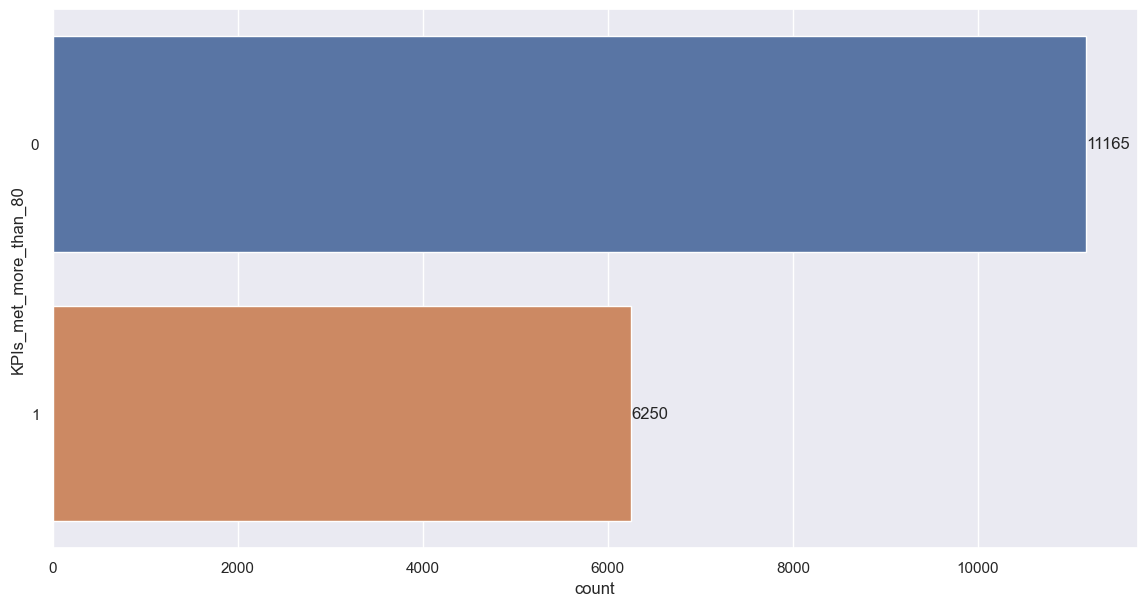

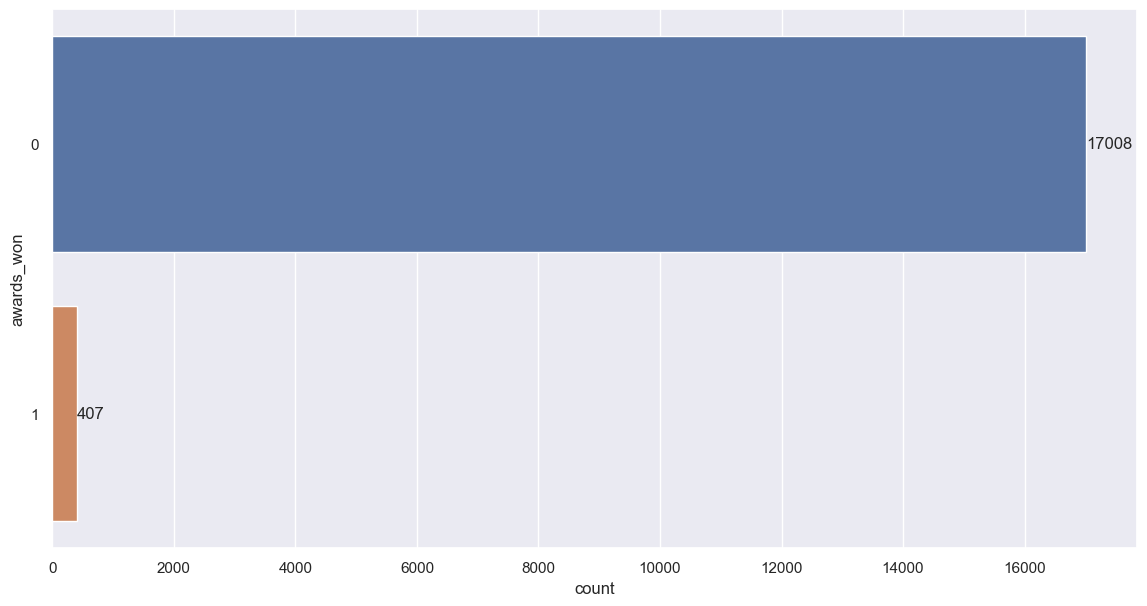

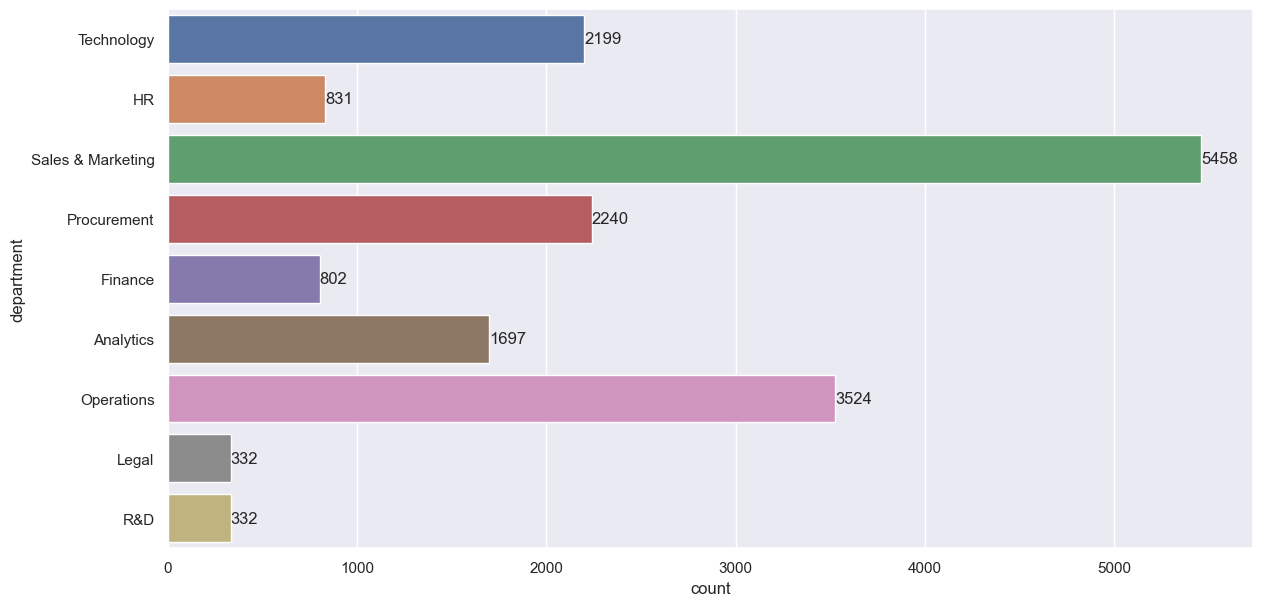

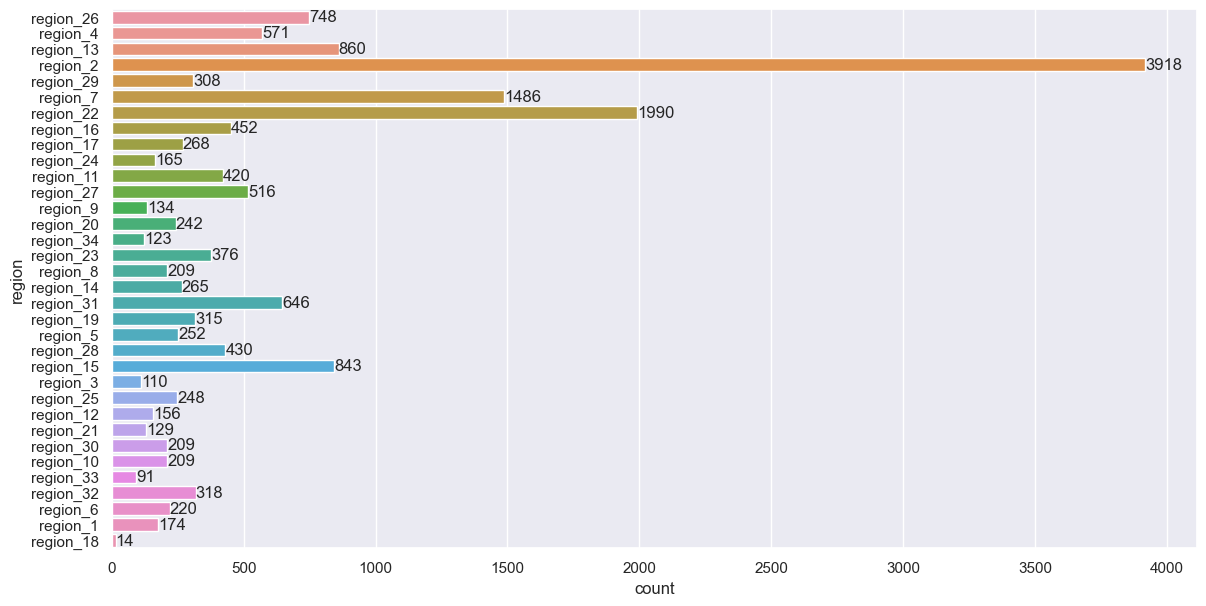

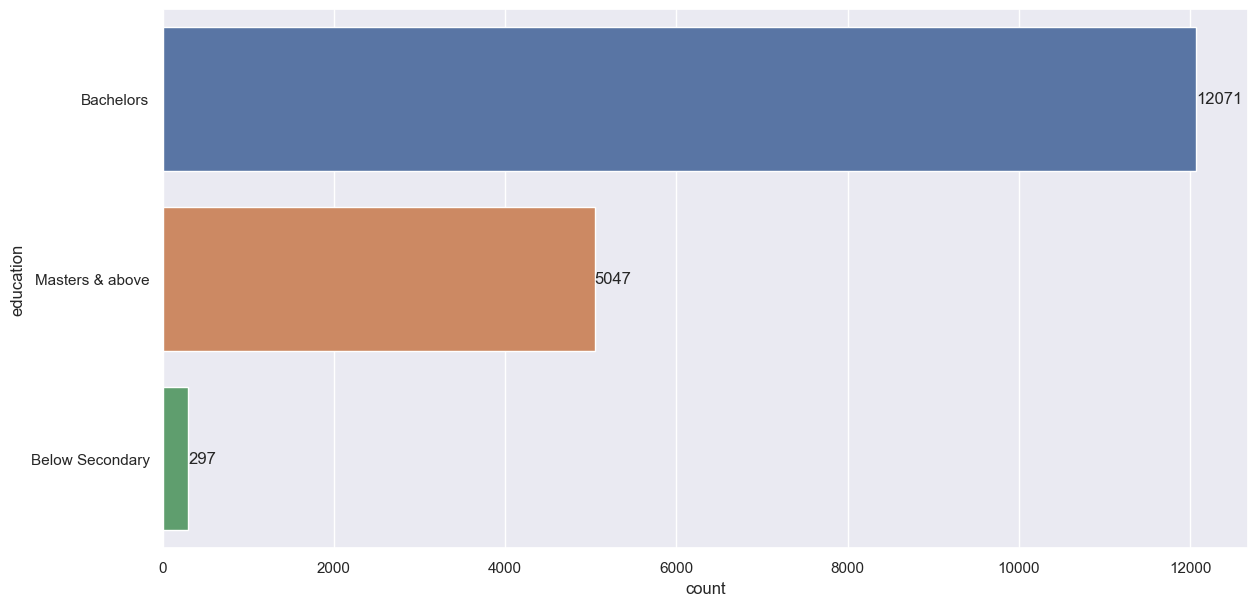

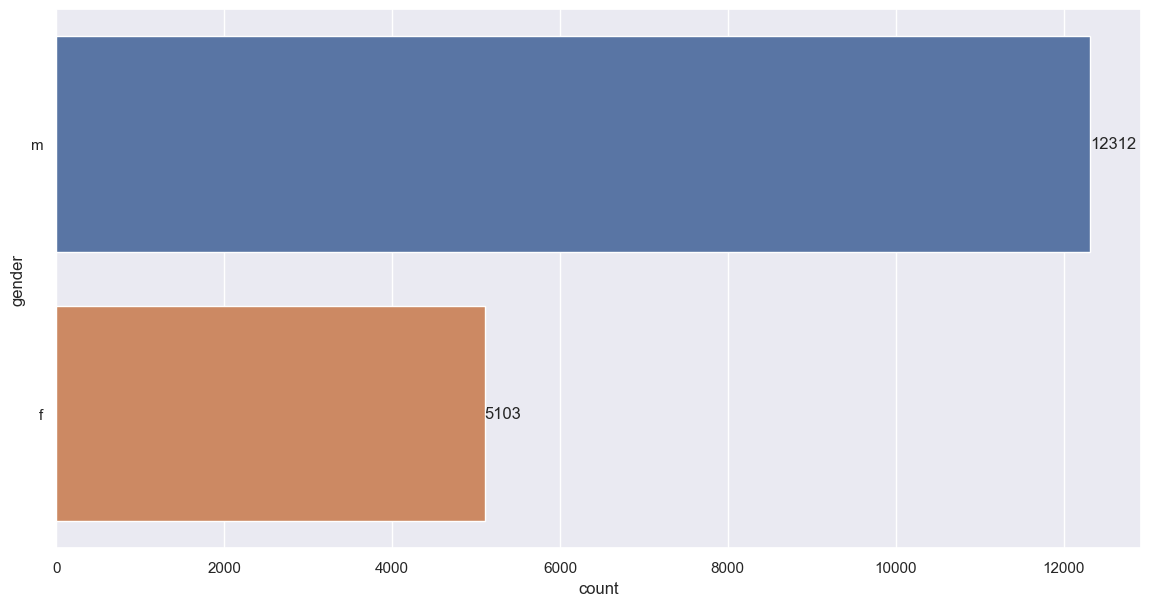

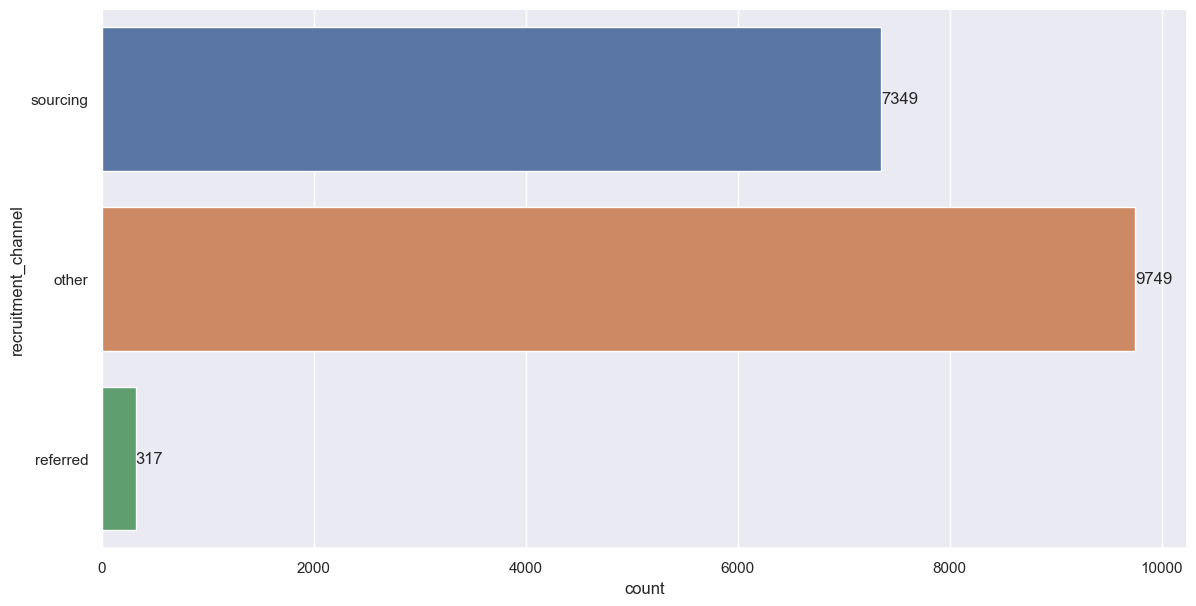

In [50]:

for col in c:
    plt.figure(figsize=(14,7))
    ax = sns.countplot(y=col, data=df)
    for cont in ax.containers:
        ax.bar_label(cont, label_type='edge')
    plt.show()

### Relationship between numerical features:

In [54]:
numeric

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score'],
      dtype='object')

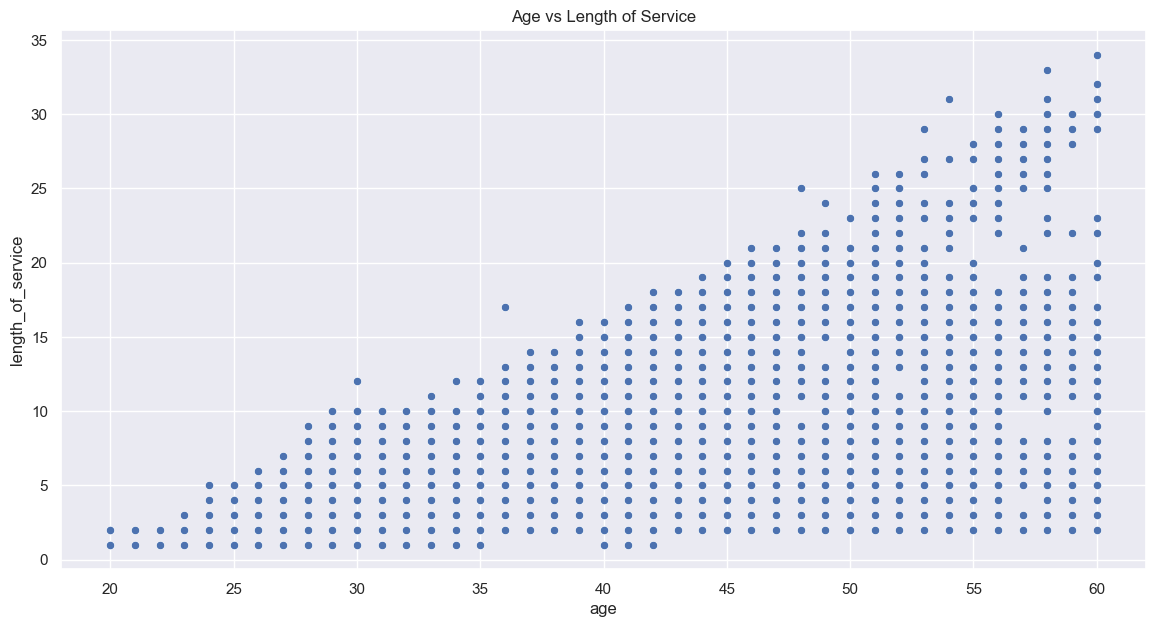

In [53]:
plt.figure(figsize=(14,7))
sns.scatterplot(x='age', y='length_of_service', data=df)
plt.title('Age vs Length of Service')
plt.show()

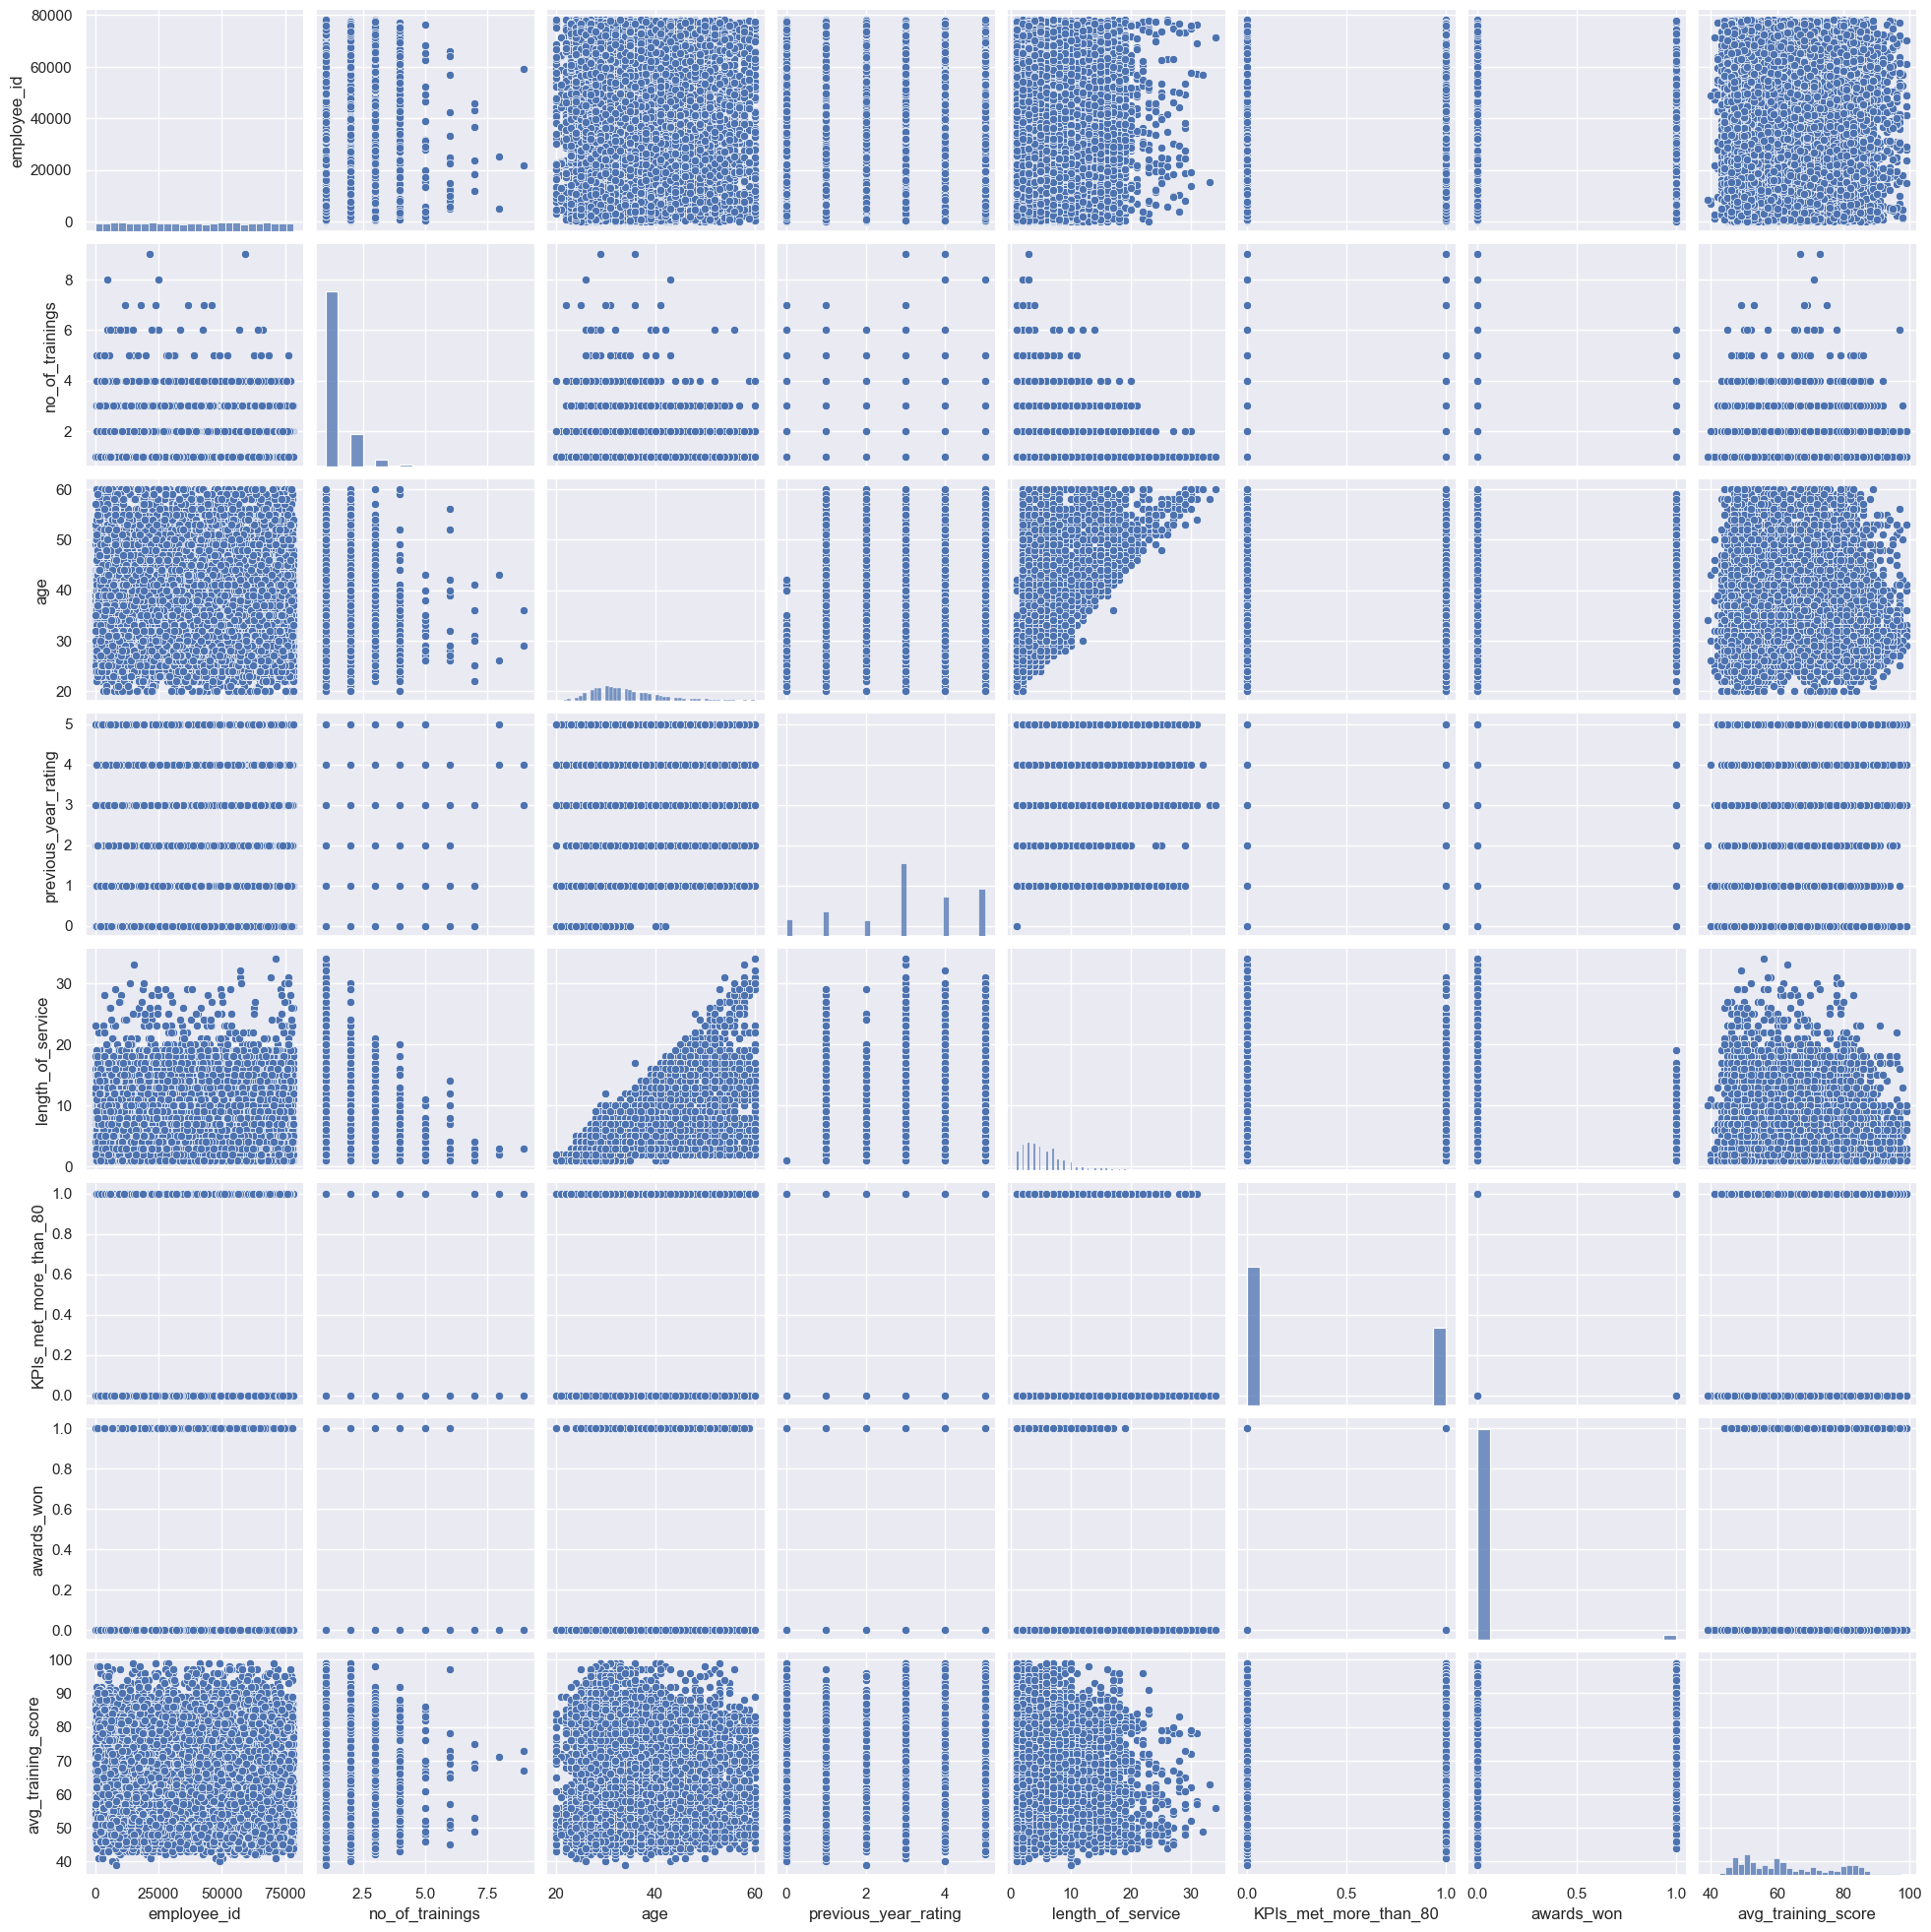

In [62]:
sns.pairplot(df[numeric])
plt.show()